# Background
* We have identified a problem and opportunity for students to become more aware of skills to obtain by taking specific IT courses at GGC.  
* Our intuition is that if students have access to job-market data about skills, they will more likely choose the right courses to enhance the skills they need upon graduation.
* In the "Matching IT Job Skills & GGC Courses" poster for the GGC Symposium I have outlined the process I used to manually cross-index job listing skills data to entry-level positions and then to my specific GGC courses.
* By going through this manual process it has become evident that the need to develop an automated solution is required in order to become an effective tool for students. 




# Data Analysis
* Using Jupyter notebook on google colab we will import job data sets for entry-level positions and run python code on the job descriptions to count and tabulate the total number unique words.
* We will then isolate skill-based words through a secondary filter and provide a meaningful report on the most requested skills mentioned by employers in the job listings. 

## Step 1
Setup Data Import from my Google Drive

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


# Step 2
Import specific job data sets into working sets, display # rows and columns, and preview header data.  These data sets have been prepared in Excel, initially filtered by job title and excluding experienced titles such "Lead Data Scientist" or "Senior Systems Software Engineer".
* DF_8_SD is a filtered dataset for "Junior Software Developers" and 
"Entry-Level Software Developers"
* DF_10_DS is a filtered dataset for "Data Scientists"
* DF_3_DA is a filtered dataset for "Data Analysts" 



In [3]:
DF_8_SD = pd.read_csv('/content/grive/MyDrive/STEC 4500/Data Sets Job Postings/DS-8/DS-8 Junior Entry Level SD.csv')
role1 = "Junior Software Developers and Entry-Level Software Developers"

In [ ]:
DF_10_DS = pd.read_csv('/content/grive/MyDrive/STEC 4500/Data Sets Job Postings/DS-10/DS-10 Data Scientist.csv')
role3 = "Data Scientists"

In [ ]:
DF_3_DA = pd.read_csv('/content/grive/MyDrive/STEC 4500/Data Sets Job Postings/DS-3 Data Analyst.csv')
role2 = "Data Analysts"

In [4]:
# This assigns specific dataset to the data frame and the specific role for that dataframe
df = DF_8_SD
role = role1

In [5]:
# This confirms the number of rows and columns in data frame
df.shape

(719, 10)

In [6]:
# This confirms the column headings and first row(s) of data 
df.head(3)

,job_title,job_description,city,state,category,company_name,crawl_timestamp,post_date,job_type,job_board
0,Junior Software Developer,"About Harmer Consultants, Inc: Harmer Consulta...",Chicago,IL,NaN,"Harmer Consultants, Inc.",2019-02-06 06:12:34 +0000,43501,Contract,dice
1,Junior Software Developer,RESPONSIBILITIES: Kforce has a client seeking ...,Windsor,CT,arts design and media,Kforce Technology,2019-02-06 06:36:26 +0000,43501,Contract,careerbuilder
2,Junior Software Developer,RESPONSIBILITIES: Kforce has a client seeking ...,Windsor,CT,NaN,Kforce Technology Staffing,2019-02-06 06:36:42 +0000,43503,Contract,dice


In [7]:
# Must copy the exact syntax of the job description column header to the job description string
job_des = "job_description"

# Step 3
Run a word frequency analysis inside of the Job Description column for all rows and then print in ranked order the most common words and the percentage of rows where each word appears at least once.

Consolidate the full list of word frequencies into 2 separate smaller lists of soft skills and technical skills.

In [8]:
# Excludes common words and other words that provide little context to job skills or requirements
excl_dict = {'c','.','--','10','6','other', 'through', 'talent', '401', 'from', 'responsibilities', 'over', 'companies', 'position', 'growing', 'pay', 'veteran', 'equal', 'please', 'meet', 'candidates', 'today', 'two', 'needed', 'want', 'next', 'needs', 'dental', 'both', 'include', 'without', 'identity', 'los', 'state', 'paid', 'days', 'www', 'seeking', 'been', 'around', 'hired', 'poster', 'washington', 'affirmative', 'throughout', 'plus', 'recruiters', 'sectors', 'city', 'welcome', 'corporate', 'much', 'metro', 'description', 'housing', 'providing', 'minimum', 'small', 'now!', 'also', 'starting', 'marital', 'visas', 'bring', 'leading', 'street', 'mentioned', 'glassdoor', 'stock', 'preference', 'fair', 'firms', 'given', 'key', 'while', 'like', 'just', 'then', 'which', 'francisco', 'angeles', 'pluses', 'hiring', 'right', 'nyse', 'bonus', 'first', 'majors', 'navigants', 'eligibility', 'each', 'during', 'httpswww', 'comblogcompanies-awesome-benefits-2018', 'would', 'tx', 'levels', 'several', 'safe', 'community', 'different', 'positions', 'includes', 'since', 'become', 'being', 'could', 'dallas', 'along', 'upon', 'genesis10', 'dev10', 'g10', 'athttps', 'scalable', 'preferably', 'caterpillar', 'least', 'after', '-', 'under', 'including', 'their', 'job', 'was', 'candidate', 'use', 'day', 'that', 'sexual', 'when', 'its', 'follow', 'offer', 'by', 'off', 'come', 'religion', 'who', 'has', 'here', 'what', 'using', 'strong', 'such', 'get', 'where', 'gain', 'those', 'may', 'sex', 'your', 'them', 'currently', 'only', '401k', 'takes', 'etc', '¢', '·', 'york', 'they', 'does', 'should', 'than', 'how', 'into', '0-3', 'resume', '&nbsp', '55', 'very', 'top', 'race', 'but', 'not', '90', '3', 'with', 'no', 'be', 'if', 'we', 'age', 'up', 'our', 'will', 'all', 'do', '0', '1', 'inc', 'any', 'you', '4', '5', 'one', 'this', 'can', '2', 'have', '&', 'looking', 'need', 'some', 'about', '500', '000', '8', '100', 'job-postings', 'now', 'ago', 'com', 'va', 'must', 'of', 'in', 'a', 'or', 'an', 'on', 's', 'at', 'it', 'd', 're', 'e', 'u', 'g', 't', 'i', 'and', 'to', 'k', 'as', 'us', 'is', 'are', 'll', 'so', 'the', 'for'}

# Includes any words that are part of 2 word phrases
incl_dict = {'java script'}

In [9]:
import pandas
import re
from collections import Counter
results = Counter()
all_words = {}

print ("Frequency analysis for",len(df),role,"job listings")

# strips out messy characters
df[job_des] = df[job_des].str.replace("[,,_,ã,—,$,*,:,™,/,;,”,),Â,â€“,(,,,|]"," ")

# substitutes error-producing characters (that should still be shown)
df[job_des] = df[job_des].str.replace('+','⁺')

# splits all words in dataframe column and updates keyword/count pairs to counter object
df[job_des].str.split().apply(results.update)

# loops through counter object (top 1000 keyword/count pairs)
total_occur = 0
for value, count in results.most_common(1000):
   if value.lower() not in excl_dict:
        # determines number of rows each value is contained in
        numRows = df[job_des].str.contains(value, na=False).value_counts()[True]        
        
        # optional print list showing more data
        # print(value, count, numRows, "{:2.1%}".format(numRows/len(DF_8_SD.index)))       

        # builds all_words dictionary with % values
        all_words.update({value : numRows/len(df.index)})            

# builds reverse order dictionary based on value, and prints out to confirm
rev_all_words = sorted(all_words, key=all_words.get, reverse=True)  
for r in rev_all_words:
    print(r,"{:2.1%}".format(all_words[r]))

Frequency analysis for 719 Junior Software Developers and Entry-Level Software Developers job listings
develop 95.0%
work 93.7%
experience 90.3%
Software 90.0%
tech 89.4%
experience. 89.2%
development 86.4%
development. 86.2%
software 84.7%
software. 84.7%
Develop 80.5%
Java 78.3%
design 76.9%
unit 74.5%
you. 72.2%
Developer 71.2%
application 65.8%
program 64.5%
technology 63.4%
time 63.0%
test 62.4%
skills 61.9%
knowledge 61.8%
new 61.6%
out 61.2%
system 59.8%
care 59.5%
applications 59.4%
support 59.0%
able 59.0%
applications. 59.0%
provide 58.8%
skills. 58.6%
solutions 58.4%
environment 58.4%
solutions. 58.4%
project 58.3%
ability 58.3%
code 57.3%
year 56.7%
team 56.2%
environment. 56.2%
Science 56.1%
team. 55.9%
Computer 55.2%
apply 55.1%
apply. 55.1%
Experience 54.8%
⁺ 54.4%
Bachelor 52.7%
Engineer 52.2%
grow 51.7%
end 51.6%
service 51.5%
years 50.9%
following 50.8%
web 50.8%
C# 50.8%
part 50.1%
career 49.8%
services 49.5%
implement 49.5%
degree 49.4%
business 49.2%
Junior 49.0%
S

{'Java': 78.30319888734353, 'C#': 50.76495132127955, 'SQL': 48.67872044506258, 'Python': 31.84979137691238, 'C⁺⁺': 31.571627260083453, '.Net': 31.154381084840054, '.NET': 31.154381084840054, 'CSS': 29.207232267037554, 'JavaScript': 22.11404728789986, 'interface': 20.58414464534075, 'Server': 18.915159944367176, 'MVC': 18.776077885952713, 'REST': 18.776077885952713, 'database': 18.636995827538247, 'Microsoft': 17.941585535465926, 'Object-Oriented': 17.10709318497914, 'PHP': 16.133518776077885, 'Angular': 15.855354659248958, 'HTML': 15.577190542420027, 'Agile': 15.299026425591098, 'Javascript': 15.159944367176633, 'Ruby': 13.490959666203059, 'interfaces': 12.517385257301807, 'ASP.NET': 12.517385257301807, 'API': 12.378303198887343, 'middleware': 11.821974965229485, 'MySQL': 11.68289290681502, 'agile': 10.987482614742698, 'UI': 10.848400556328233, 'databases': 10.570236439499304, 'jQuery': 10.570236439499304, 'Git': 10.15299026425591, 'Linux': 8.90125173852573, 'XML': 8.90125173852573, 'A

<BarContainer object of 44 artists>

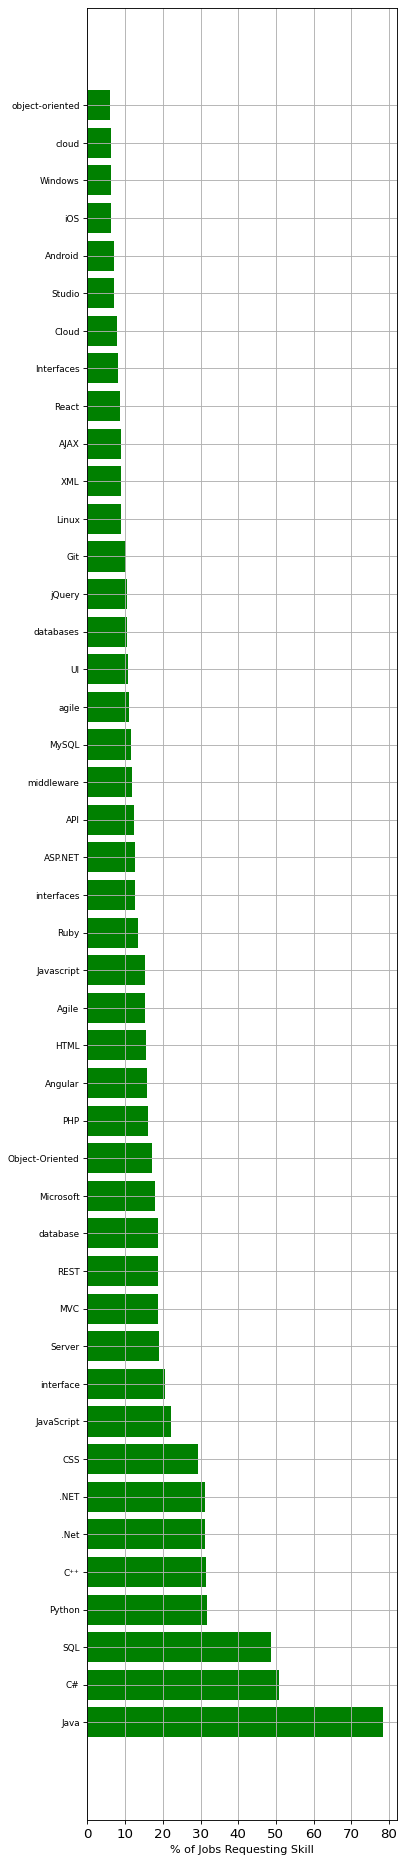

In [12]:
hard_skills = {'c⁺⁺','ui', 'development', 'java', 'program', 'net', 'ms', 'technology', 'knowledge', 'degree', 'system', 'stem', 'test', 'science', 'engineer', 'project', 'applications', 'web', 'code', 'junior', 'bachelor', 'script', 'systems', 'implement', 'c#', 'object', 'build', 'rest', 'sql', 'requirements', 'technical', 'developing', 'reference', 'summary', 'training', 'language', 'developers', 'enterprise', 'written', 'languages', 'manage', 'javascript', 'data', 'document', 'technologies', 'python', 'testing', 'certification', 'api', 'create', 'entry', 'package', 'math', 'css', 'security', 'process', 'vision', 'financial', 'designing', 'games', 'asp', 'stack', 'college', 'tools', 'programs', 'agile', 'object-oriented', 'database', 'server', 'interface', 'drive', 'analysis', 'platform', 'network', 'architecture', 'mvc', 'methodologies', 'apps', 'troubleshoot', 'microsoft', 'statistics', 'framework', 'git', 'coding', 'integration', 'html', 'gaming', 'angular', 'php', 'model', 'jquery', 'ruby', 'analytics', 'interfaces', 'debug', 'js', 'research', 'mathematics', 'cloud', 'middleware', 'mysql', 'databases', 'ios', 'ajax', 'linux', 'frameworks', 'xml', 'platforms', 'react', 'scrum', 'mobile', 'studio', 'android', 'aws', 'windows', 'scripting', 'apis', 'web-based', 'unix', 'asp.net','r','vb','node','java','sql','angular','apis','cloud','python','debug','bachelor','.net','c#','js','php','html','agile','css','microsoft','degree','javascript','scrum','xml','ios'}
tool_skills = {'c⁺⁺','ui', 'java', '.net', 'c#', 'rest', 'sql', 'javascript', 'python', 'api', 'css', 'asp', 'agile', 'object-oriented', 'database', 'server', 'interface', 'mvc', 'git', 'html', 'angular', 'php', 'jquery', 'ruby', 'interfaces', 'js', 'cloud', 'middleware', 'mysql', 'databases', 'ios', 'ajax', 'linux', 'xml', 'react', 'scrum', 'mobile', 'studio', 'android', 'aws', 'windows', 'apis', 'unix', 'asp.net','r','vb','node','sql','angular','apis','cloud','python','debug','.net','c#','js','php','html','agile','css','microsoft','javascript','scrum','xml','ios'}
# full list of ...  tech_words = {'develop', 'software', 'ui', 'development', 'developer', 'design', 'java', 'program', 'unit', 'net', 'ms', 'technology', 'knowledge', 'application', 'computer', 'degree', 'system', 'stem', 'test', 'science', 'engineer', 'project', 'applications', 'web', 'environment', 'code', 'engineering', 'junior', 'bachelor', 'script', 'systems', 'implement', 'c#', 'business', 'object', 'build', 'rest', 'sql', 'requirements', 'programming', 'health', 'projects', 'technical', 'developing', 'reference', 'summary', 'training', 'language', 'developers', 'enterprise', 'written', 'languages', 'manage', 'javascript', 'data', 'document', 'technologies', 'python', 'testing', 'certification', 'api', 'create', 'entry', 'package', 'medical', 'math', 'css', 'security', 'process', 'vision', 'financial', 'designing', 'games', 'asp', 'stack', 'college', 'architect', 'tools', 'programs', 'agile', 'object-oriented', 'database', 'server', 'interface', 'drive', 'healthcare', 'analysis', 'law', 'analyze', 'platform', 'network', 'functions', 'architecture', 'mvc', 'methodologies', 'engineers', 'apps', 'troubleshoot', 'microsoft', 'statistics', 'background', 'framework', 'git', 'coding', 'integration', 'html', 'gaming', 'consulting', 'enterprises', 'angular', 'php', 'solid', 'develops', 'emerging', 'model', 'jquery', 'ruby', 'analytics', 'interfaces', 'debug', 'js', 'research', 'mathematics', 'cloud', 'middleware', 'mysql', 'intelligence', 'databases', 'ios', 'creed', 'ajax', 'linux', 'frameworks', 'xml', 'packages', 'optimize', 'website', 'platforms', 'react', 'scrum', 'automation', 'on-call', 'deep', 'mobile', 'studio', 'android', 'aws', 'windows', 'hardware', 'scripting', 'apis', 'relational', 'web-based', 'unix', 'analysts','ui','asp.net','r','vb','node','java','sql','angular','apis','cloud','python','debug','bachelor','.net','c#','js','php','html','agile','css','microsoft','degree','javascript','scrum','xml','ios'}tech_skills = {}
soft_skills = {'problem', 'solution', 'support', 'service', 'solutions', 'services', 'solve', 'agile', 'ability', 'team', 'communication', 'assist', 'passion', 'lead', 'interest', 'assistance', 'mentoring', 'verbal', 'understand', 'understanding', 'focus', 'complex', 'specific', 'quality', 'solving', 'leader', 'innovative', 'responsible', 'challenging', 'collaborate', 'communicate', 'engaging', 'eagerness', 'solver', 'teams', 'analytical', 'driven', 'demonstrate', 'focused', 'helps', 'helpful', 'self-direct', 'leadership', 'communicates', 'collaborates', 'responsiveness', 'high-pressure', 'coordinate', 'self-motivator', 'passionate', 'creative', 'committed', 'fast-paced', 'flexible', 'collaboration', 'communications'}


# plot_skills holds the value of selected skills dictionaries above  
plot_skills = {}
plot_skills = tool_skills

# new dictionary to be built
skill_words = {}                

# iterates through all words  
for r in rev_all_words:
   if r.lower() in plot_skills:
    skill_words.update({r : all_words[r]*100})
print(skill_words)
reverse_words = sorted(skill_words, key=skill_words.get, reverse=True)  
print(reverse_words)
ac_words = dict(sorted(skill_words.items(), key=lambda x: x[0].upper()))
print(ac_words)
lc_words = dict((k.lower(), v) for k, v in skill_words.items()) 
print(lc_words)

# assigns which word list (printed above) to plot
plot_words = skill_words  

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(5,30), dpi=80)
plt.grid()
plt.xlabel('% of Jobs Requesting Skill')
plt.yticks(fontsize=8)
plt.xticks(fontsize=12, rotation=0)
x = list(plot_words.values())
y = list(plot_words.keys())

plt.barh(y, x, height = .8, color = 'green')

